<a href="https://colab.research.google.com/github/di2001597-cmyk/-/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%A1%B0%EB%B3%84%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **문제상황**


-  박월천은 국한밭대학교 산업경영공학과 졸업을 한 학기 남겨두고 있는 대학교 4학년 학생이자 취업준비생이다. 졸업 후 진로를 결정해야 하지만 무엇을 해야 할지도 모르겠고 어디에 어떻게 취업을 해야 할지도 막막한 상황이다. 특히, AI의 확산으로 많은 기업이 인턴, 신입들을 뽑지 않는 암울한 상황에서 월천이가 당면한 암담한 상황을 헤쳐나가는데 도움이 되는 python 프로그램을 설계하고 구현해보자.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.1 MB/s eta 0:00:00


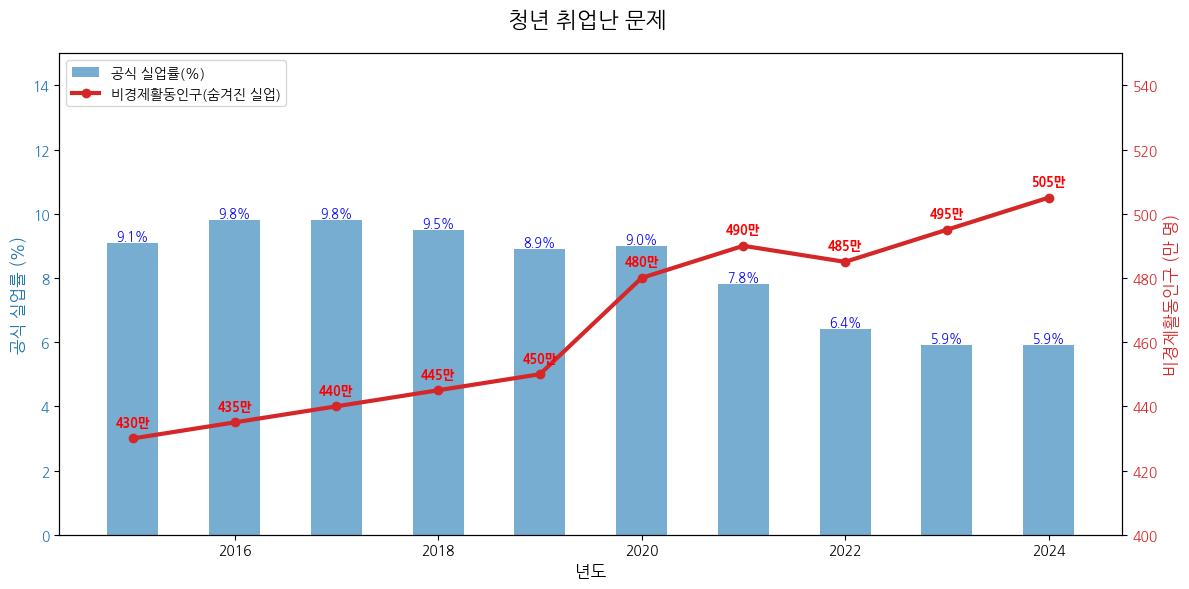

In [2]:
# 1. 한글 폰트 라이브러리 설치 (Colab용)
!pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

# 2. 데이터 정의
# 설명: 실업률은 떨어지지만, 비경제활동인구(구직 포기 등)는 오히려 늘어나거나 높은 수준을 유지하는 현상
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# 공식 실업률 (%) - 하락세
official_unemployment = [9.1, 9.8, 9.8, 9.5, 8.9, 9.0, 7.8, 6.4, 5.9, 5.9]

# 청년 비경제활동인구 수 (단위: 만 명, 가상 데이터) - 상승세
# 취업을 아예 포기하거나 '쉬었음' 상태인 인구가 늘어남
inactive_population = [430, 435, 440, 445, 450, 480, 490, 485, 495, 505]

# 3. 이중 축 그래프 그리기 (Dual Axis)
fig, ax1 = plt.subplots(figsize=(12, 6))

# [왼쪽 축] 막대 그래프: 공식 실업률
color_1 = 'tab:blue'
ax1.set_xlabel('년도', fontsize=12)
ax1.set_ylabel('공식 실업률 (%)', color=color_1, fontsize=12)
bars = ax1.bar(years, official_unemployment, color=color_1, alpha=0.6, label='공식 실업률(%)', width=0.5)
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.set_ylim(0, 15)

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%', ha='center', va='bottom', color='blue', fontsize=9)

# [오른쪽 축] 꺾은선 그래프: 비경제활동인구
ax2 = ax1.twinx()  # x축을 공유하는 새로운 y축 생성
color_2 = 'tab:red'
ax2.set_ylabel('비경제활동인구 (만 명)', color=color_2, fontsize=12)
line = ax2.plot(years, inactive_population, color=color_2, marker='o', linewidth=3, label='비경제활동인구(숨겨진 실업)')
ax2.tick_params(axis='y', labelcolor=color_2)
ax2.set_ylim(400, 550) # 데이터 변화가 잘 보이도록 범위 조정

# 꺾은선 위에 수치 표시
for i, txt in enumerate(inactive_population):
    ax2.text(years[i], inactive_population[i]+3, f'{txt}만', ha='center', va='bottom', color='red', fontsize=9, fontweight='bold')

# 4. 그래프 꾸미기
plt.title('청년 취업난 문제 ', fontsize=16, pad=20)
plt.grid(True, axis='x', alpha=0.3)

# 범례 합치기 (막대 + 선)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

# **세부목표**

1. 사용자가 지역, 학과, 직무를 입력하면 동일 유형의 사람들의 취업 정보가 출력됨
  - 본인과 비슷한 조건의 사람들이 어떤 진로를 택하였는지 파악하며, **진로 선택의 방향성**을 잡을 수 있다.

2. 사용자가 이메일을 입력하면, 매주 월요일마다 웹크롤러가 채용 정보를 끌어와서 이메일로 발송해줌
- 자신이 지원 예정이거나 지원한 공공기관의 채용 일정을 일일이 찾을 필요없이 한번에 확인함으로써 **취업준비의 편의성**이 올라간다.


3. 사용자가 본인의 취업 정보와 취직 희망 기관 등을 입력하면 서비스에 저장됨
- 본인의 정보와 취직 희망 기관이 저장되어, **언제든지 확인하고 관리하기 용이**해진다.
  

# **데이터 준비**

- 데이터 출처 및 수집 방법

  - 교육통계서비스(KESS) > 2023 취업통계연보
      - 대학 > 전공별 취업통계현황 > 전공별 졸업상황
      - 대학 > 학교 소재지별 취업통계현황 > 대학 소재지별 졸업상황
      - 대학 > 유지 취업률현황 > 전공별 유지취업률 현황 / 학교 소재지별 유지취업률 현황


  - 공공데이터포털 > 기획재정부 공공기관 채용정보 조회서비스
      - 기관명, 제목(모집내용), 등록일, 마감일, 상태



# **기대효과**

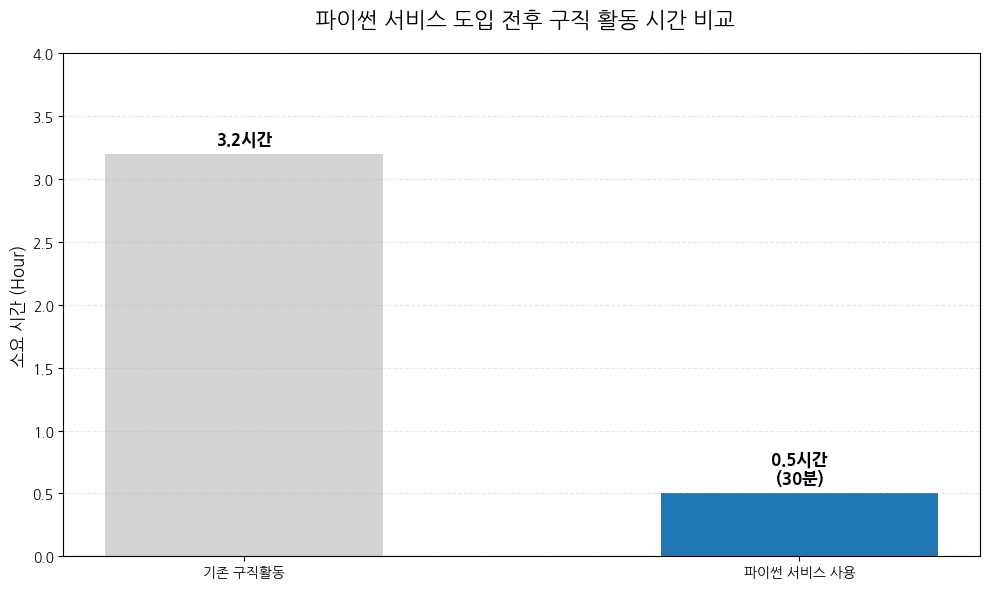

In [ ]:
# 1. 한글 폰트 라이브러리 설치 (Colab용)
!pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import koreanize_matplotlib

# 2. 데이터 정의
categories = ['기존 구직활동', '파이썬 서비스 사용']

times = [3.2, 0.5]

# 3. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프 생성
colors = ['#d3d3d3', 'tab:blue']
bars = ax1.bar(categories, times, color=colors, width=0.5)

# 축 설정
ax1.set_ylabel('소요 시간 (Hour)', fontsize=12)
ax1.set_ylim(0, 4)  # Y축 여유 공간 확보

# 막대 위에 수치 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    # 텍스트 라벨 설정
    if i == 1:
        text_label = f'{height}시간\n(30분)'
    else:
        text_label = f'{height}시간'

    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             text_label, ha='center', va='bottom', fontsize=12, fontweight='bold')

# 4. 그래프 꾸미기
plt.title(' 파이썬 서비스 도입 전후 구직 활동 시간 비교', fontsize=16, pad=20)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# 데이터 전처리

# 탐색적 데이터 분석 (EDA)

# 데이터 분할

# 데이터 준비

# 모델 학습

# 모델 평가